In [1]:
%matplotlib inline

In [2]:
from itertools import chain, combinations

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

import statsmodels.api as sm
from patsy import dmatrices

/Users/dimazest/miniconda3/envs/notebook/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
import matplotlib
matplotlib.rc('pdf', fonttype=42)

In [4]:
!scp frank:/import/dima-scratch/phd-buildout/experiments/emnlp14/results_all.csv .

results_all.csv                               100%   16MB 414.6KB/s   00:39    


In [5]:
all_results = pd.read_csv('results_all.csv', low_memory=False)

In [6]:
# all_results[all_results['SimLex999'].isnull() & (all_results['operator'] == 'head') & all_results['fold_label'].isnull()]

In [7]:
columns = [c for c in all_results.columns if c not in ('fold_label', 'men', 'SimLex999', 'emnlp2013_turk', 'gs2011')]

In [8]:
all_results.loc[:, 'fold_label'].fillna('max', inplace=True)

In [9]:
all_results.loc[:, 'neg'].fillna('N/A', inplace=True)

In [10]:
for c in columns:
    all_results.loc[:, c].fillna('', inplace=True)

In [11]:
all_results = all_results.set_index(columns + ['fold_label']).unstack('fold_label')

In [12]:
results = all_results.groupby(level=[c for c in columns if c != 'fold_num']).mean()

In [13]:
results = results.reorder_levels([1, 0], axis=1)

In [14]:
results.dropna(inplace=True)

# Max selection

In [15]:
def selection_plot(results, selection_type, dataset):
    for hue in (
            'freq',
            'neg',
            'cds',
            'similarity',
            'discr',
    ):
        g = sns.factorplot(
            data=results,
            y=dataset,
            x='dimensionality',
            hue=hue,
            hue_order={
                'cds': ('global', '1', '0.75'),
                'neg': (0.2, 0.5, 0.7, 1, 1.4, 2, 5, 'N/A'),
                'similarity': ('cos', 'correlation', 'inner_product'),
                'freq': ('1', 'n', 'logn'),
                'discr': ('pmi', 'cpmi', 'spmi', 'scpmi'),
            }[hue],
            col='operator',
            col_order=('add', 'head', 'mult', 'kron') if dataset in ('emnlp_2013', ) else ['head'],
            size=3,
            aspect=1.6,
        )

        g.fig.savefig('figures/{}-{}-selection-{}.pdf'.format(dataset, selection_type, hue))

In [16]:
def max_(df, dataset):
    best_index = df['max', dataset].argmax()
    best_result = df.loc[best_index]
    result = pd.concat(
        [
            pd.Series(
                {
                    dataset: best_result['max', dataset],
#                     'gs2011': best_result['max', 'gs2011'],
                }
            ),
            pd.Series(best_index, index=df.index.names),
        ]
    )

    return result

In [27]:
def plot_selection(results, dataset, selector_function):
    selection = (
        results
        .groupby(level=['operator', 'dimensionality'])
        .apply(selector_function, dataset=dataset)
    )
    selection['selection'] = selector_function.__name__
    
    selection_plot(selection, selection_type='max', dataset=dataset)
    
    return selection

/Users/dimazest/miniconda3/envs/notebook/lib/python3.5/site-packages/seaborn/categorical.py:1462: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/Users/dimazest/miniconda3/envs/notebook/lib/python3.5/site-packages/seaborn/categorical.py:1464: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  stat_data = remove_na(group_data[hue_mask])


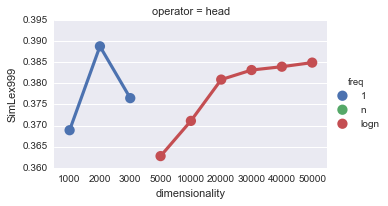

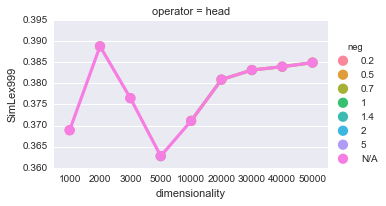

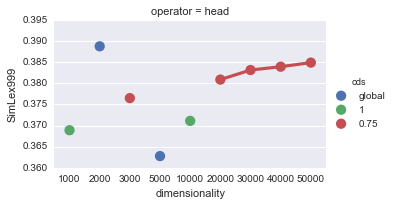

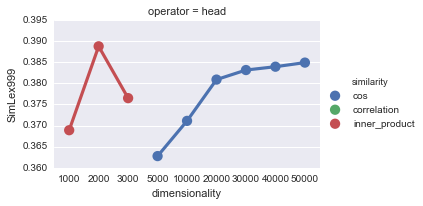

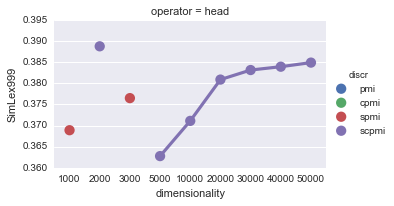

In [28]:
max_selection_simlex = plot_selection(results, dataset='SimLex999', selector_function=max_)

/Users/dimazest/miniconda3/envs/notebook/lib/python3.5/site-packages/seaborn/categorical.py:1462: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/Users/dimazest/miniconda3/envs/notebook/lib/python3.5/site-packages/seaborn/categorical.py:1464: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  stat_data = remove_na(group_data[hue_mask])


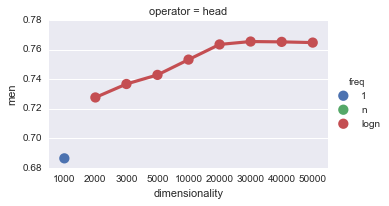

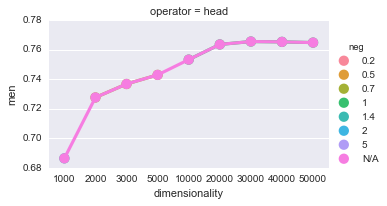

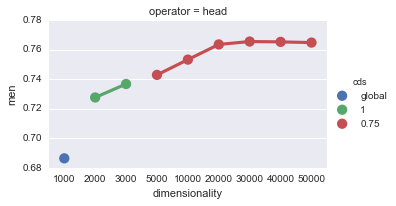

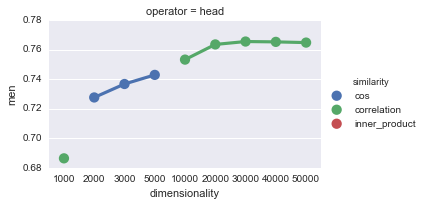

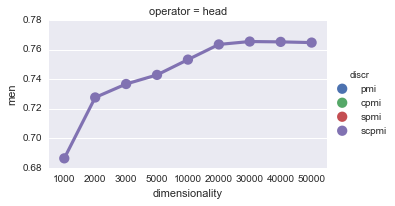

In [29]:
max_selection_men = plot_selection(results, dataset='men', selector_function=max_)

# Cross-validation

In [20]:
def cross_validation(df, dataset):
    best_training_index = df['training', dataset].argmax()
    best_training_setting = df.loc[best_training_index]

    result = pd.concat(
        [
            pd.Series(
                {
                    dataset: best_training_setting['testing', dataset],
#                     'training': best_training_setting['training', 'emnlp2013_turk'],
#                     'gs2011': best_training_setting['testing', 'gs2011'],
                }
            ),
            pd.Series(best_training_index, index=df.index.names),
        ]
    )

    return result

/Users/dimazest/miniconda3/envs/notebook/lib/python3.5/site-packages/seaborn/categorical.py:1462: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/Users/dimazest/miniconda3/envs/notebook/lib/python3.5/site-packages/seaborn/categorical.py:1464: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  stat_data = remove_na(group_data[hue_mask])


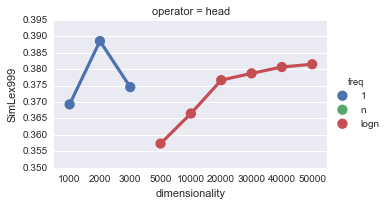

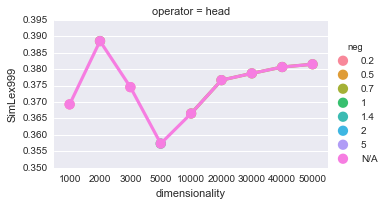

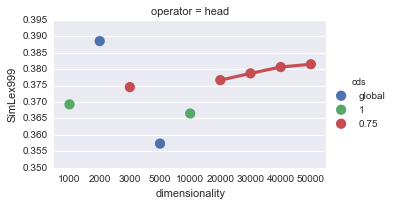

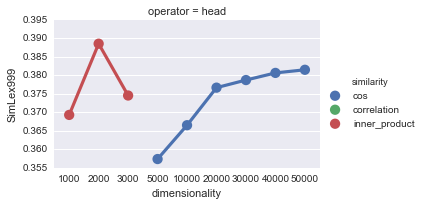

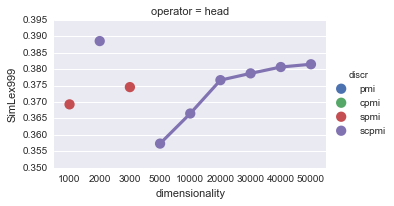

In [30]:
cross_validation_selection_simlex = plot_selection(results, dataset='SimLex999', selector_function=cross_validation)

/Users/dimazest/miniconda3/envs/notebook/lib/python3.5/site-packages/seaborn/categorical.py:1462: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/Users/dimazest/miniconda3/envs/notebook/lib/python3.5/site-packages/seaborn/categorical.py:1464: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  stat_data = remove_na(group_data[hue_mask])


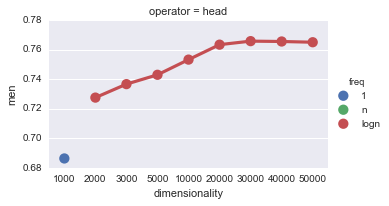

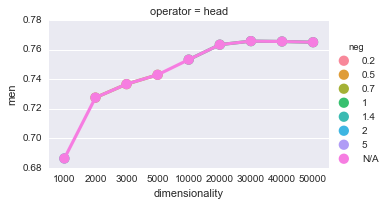

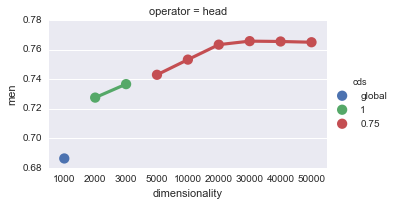

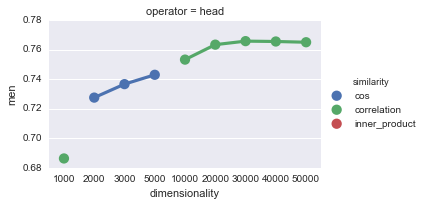

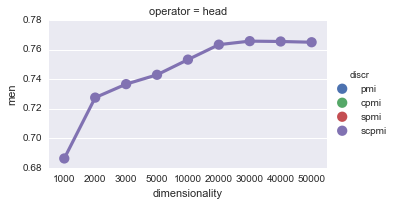

In [43]:
cross_validation_selection_men = plot_selection(results, dataset='men', selector_function=cross_validation)

# Heuristics

In [78]:
results['max'].head()

SimLex999  \
discr corpus           operator cds  freq reduction base context_type dimensionality neg similarity                 
cpmi  ukwac_wackypedia head     0.75 1    raw            nvaa         1000           N/A correlation      0.31202   
                                                                                         cos              0.31524   
                                                                                         inner_product    0.32196   
                                                                      2000           N/A correlation      0.32986   
                                                                                         cos              0.32732   

                                                                                                            men  \
discr corpus           operator cds  freq reduction base context_type dimensionality neg similarity               
cpmi  ukwac_wackypedia head     0.75 1    raw            nvaa         1000           N/A correlation    0.65180   
                                                                                         cos            0.63651   
                                                                                         inner_product  0.51917   
                                                                      2000           N/A correlation    0.68515   
                                                                                         cos            0.67318   

                                                                                                        emnlp2013_turk  \
discr corpus           operator cds  freq reduction base context_type dimensionality neg similarity                      
cpmi  ukwac_wackypedia head     0.75 1    raw            nvaa         1000           N/A correlation           0.64368   
                                                                                         cos                   0.55560   
                                                                                         inner_product         0.64014   
                                                                      2000           N/A correlation           0.64652   
                                                                                         cos                   0.56633   

                                                                                                         gs2011  
discr corpus           operator cds  freq reduction base context_type dimensionality neg similarity              
cpmi  ukwac_wackypedia head     0.75 1    raw            nvaa         1000           N/A correlation    0.34992  
                                                                                         cos            0.34986  
                                                                                         inner_product  0.30283  
                                                                      2000           N/A correlation    0.32118  
                                                                                         cos            0.31950

In [81]:
def plot_interaction(data, dataset):
    for hue in 'cds', 'neg', 'similarity':
        col='discr'
        col_order=('pmi', 'cpmi', 'spmi', 'scpmi') if hue in ('cds', 'similarity') else ('spmi', 'scpmi')

        row='freq'
        row_order=('1', 'n', 'logn')

        if hue == 'neg':
            col, row = row, col
            col_order, row_order = row_order, col_order

        g = sns.factorplot(
            data=data['max'].reset_index(),
            y=dataset,
            x='dimensionality',
            hue=hue,
            hue_order={
                'cds': ('global', '1', '0.75'),
                'neg': (0.2, 0.5, 0.7, 1, 1.4, 2, 5, 7),
                'similarity': ('cos', 'correlation'),
            }[hue],
            row=row,
            row_order=row_order,
            col=col,
            col_order=col_order,
            size=3,
            aspect=1.6,
    #         sharey=False,
            dodge=0.3,
        )

        g.fig.savefig('figures/{}-interaction-{}.pdf'.format(dataset, hue))

## SimLex-999

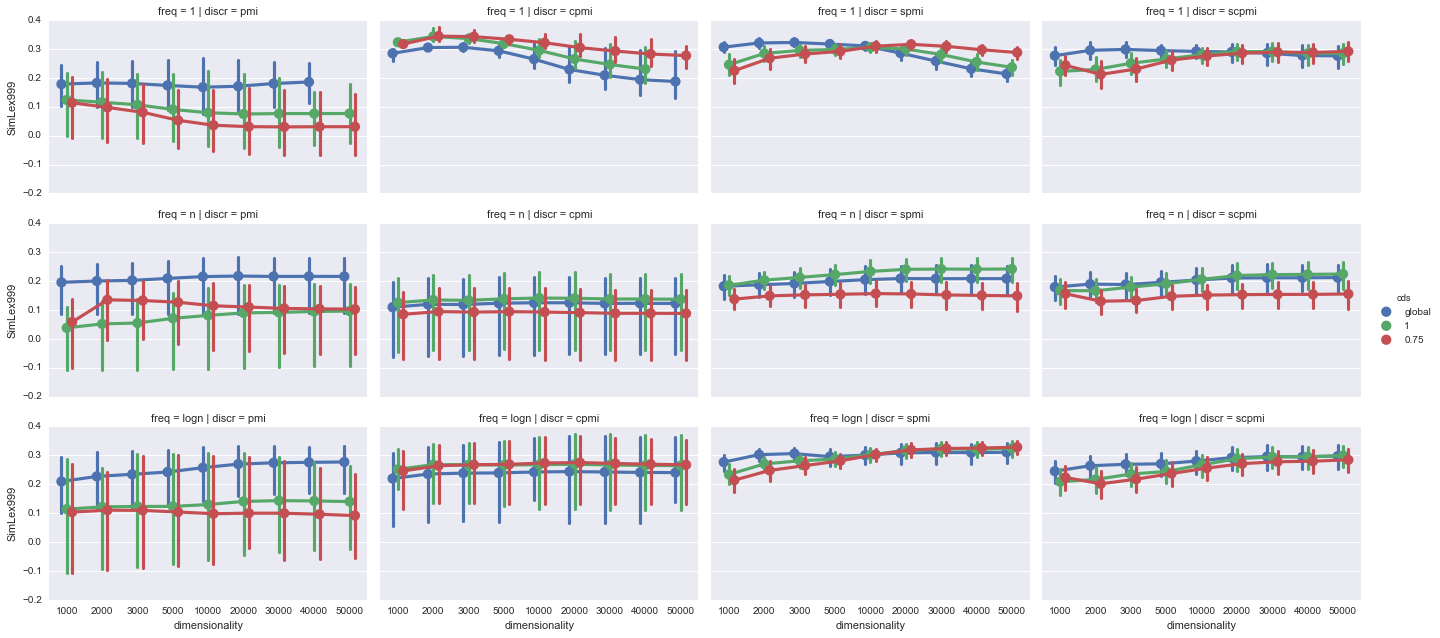

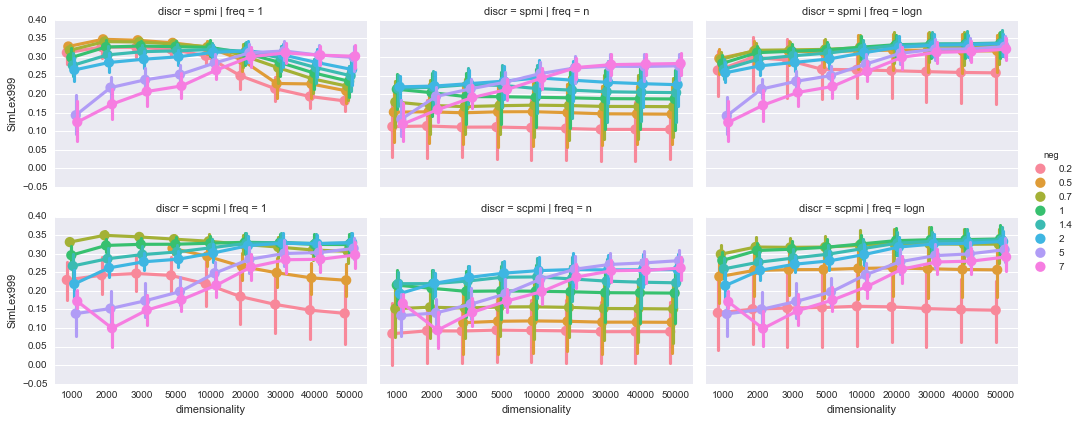

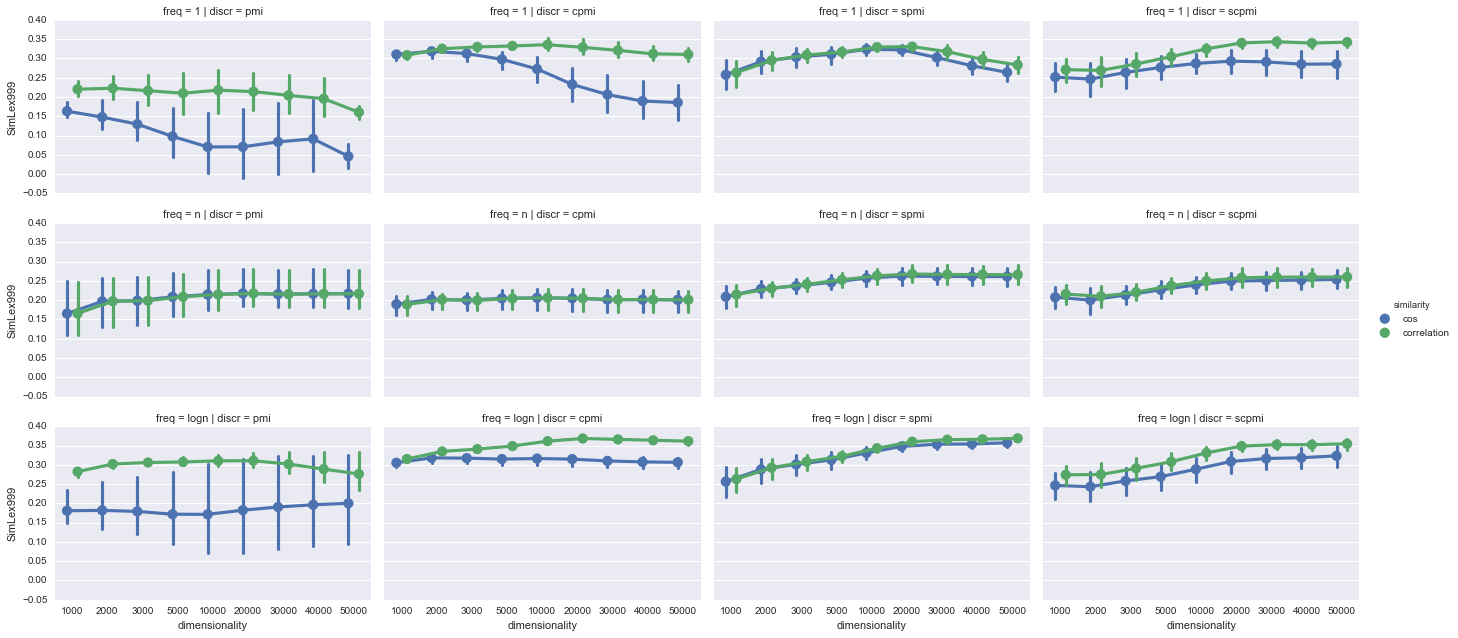

In [82]:
plot_interaction(results, 'SimLex999')

In [86]:
# results

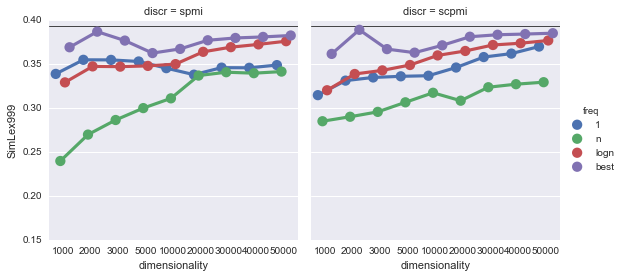

In [106]:
r = results['max'].reset_index()

heuristics_selection_simlex = pd.DataFrame(
    r.loc[
        # PMI
        (~(r['discr'] == 'pmi') | (r['cds'] == 'global')) &
        
        # 1CPMI
        (~((r['discr'] == 'cpmi') & ((r['freq'] == '1'))) | (r['cds'] == '0.75')) &
        # NCPMI
        (~((r['discr'] == 'cpmi') & ((r['freq'] == 'n'))) | (r['cds'] == '1')) &
        # logNCPMI
        (~((r['discr'] == 'cpmi') & ((r['freq'] == 'logn'))) | (r['cds'] == '1')) &

        # 1PPMI
        (
            ~((r['discr'] == 'spmi') & (r['freq'] == '1')) | (
                (~(r['dimensionality'] < 20000) | (r['cds'] == 'global')) &
                (~(r['dimensionality'] >= 20000) | (r['cds'] == '0.75'))
            )
        ) &
        (
            ~((r['discr'] == 'spmi') & (r['freq'] == '1')) | (
                (~(r['dimensionality'] < 20000) | (r['neg'] == 0.7)) &
                (~(r['dimensionality'] >= 20000) | (r['neg'] == 5))
            )
        ) &
        
        # NPPMI
        (~((r['discr'] == 'spmi') & ((r['freq'] == 'n'))) | (r['cds'] == '1')) &
        (
            ~((r['discr'] == 'spmi') & (r['freq'] == 'n')) | (
                (~(r['dimensionality'] < 20000) | (r['neg'] == 1.4)) &
                (~(r['dimensionality'] >= 20000) | (r['neg'] == 5))
            )
        ) &
        # logNPPMI
        (
            ~((r['discr'] == 'spmi') & (r['freq'] == 'logn')) | (
                (~(r['dimensionality'] < 20000) | (r['cds'] == 'global')) &
                (~(r['dimensionality'] >= 20000) | (r['cds'] == '0.75'))
            )
        ) &
        (
            ~((r['discr'] == 'spmi') & (r['freq'] == 'logn')) | (
                (~(r['dimensionality'] < 20000) | (r['neg'] == 0.5)) &
                (~(r['dimensionality'] >= 20000) | (r['neg'] == 1.4))
            )
        ) &

        # 1PCPMI
        (
            ~((r['discr'] == 'scpmi') & (r['freq'] == '1')) | (
                (~(r['dimensionality'] < 20000) | (r['cds'] == 'global')) &
                (~(r['dimensionality'] >= 20000) | (r['cds'] == '0.75'))
            )
        ) &
        (
            ~((r['discr'] == 'scpmi') & (r['freq'] == '1')) | (
                (~(r['dimensionality'] < 20000) | (r['neg'] == 0.7)) &
                (~(r['dimensionality'] >= 20000) | (r['neg'] == 2))
            )
        ) &
        # NPCPMI
        (
            ~((r['discr'] == 'scpmi') & (r['freq'] == 'n')) | (
                (~(r['dimensionality'] < 20000) | (r['cds'] == 'global')) &
                (~(r['dimensionality'] >= 20000) | (r['cds'] == '1'))
            )
        ) &
        (
            ~((r['discr'] == 'scpmi') & (r['freq'] == 'n')) | (
                (~(r['dimensionality'] < 20000) | (r['neg'] == 1.4)) &
                (~(r['dimensionality'] >= 20000) | (r['neg'] == 5))
            )
        ) &
        # logNPCPMI
        (
            ~((r['discr'] == 'scpmi') & (r['freq'] == 'logn')) | (
                (~(r['dimensionality'] < 20000) | (r['cds'] == 'global')) &
                (~(r['dimensionality'] >= 20000) | (r['cds'] == '1'))
            )
        ) &
        (
            ~((r['discr'] == 'scpmi') & (r['freq'] == 'logn')) | (
                (~(r['dimensionality'] < 20000) | (r['neg'] == 0.7)) &
                (~(r['dimensionality'] >= 20000) | (r['neg'] == 1.4))
            )
        ) &

        # Similarity
        (~((r['discr'] == 'pmi')) | (r['similarity'] == 'correlation')) &
        (~((r['discr'] == 'cpmi')) | (r['similarity'] == 'correlation')) &
        (
            ~((r['discr'] == 'spmi')) | (
                (~(r['dimensionality'] < 20000) | (r['similarity'] == 'cos')) &
                (~(r['dimensionality'] >= 20000) | (r['similarity'] == 'correlation'))
            )
        ) &
        (~((r['discr'] == 'scpmi')) | (r['similarity'] == 'correlation')) &
    True
    ]
)

heuristics_selection_simlex['selection'] = 'heuristics'

for y, best_result in zip(
    (
        'SimLex999',
#         'men',
    ),
    (0.393, 0.745),
):

    _best = r[[y, 'dimensionality', 'discr']].groupby(['dimensionality', 'discr']).max().reset_index()
    _best['freq'] = 'best'
    
    data = pd.concat(
        [
            heuristics_selection_simlex,
            _best,
        ]
    )

    g = sns.factorplot(
        data=data,
        y=y,
        x='dimensionality',
        col='discr',
        col_order=(
            #'pmi',
            #'cpmi',
            'spmi',
            'scpmi',
        ),
        hue='freq',
        hue_order=(
            '1',
            'n',
            'logn',
            'best',
        ),
        dodge=0.5,
    ).set(ylim={'SimLex999': (0.15, 0.4), 'men': (0.5, 0.8)}[y])

    for ax in g.axes[0]:
        ax.axhline(y=best_result, alpha=0.7, linewidth=1, color='black')
    
    #g.fig.savefig('figures/{}-best.pdf'.format(y))
    
del r
del best_result

heuristics_selection_simlex.set_index(['operator', 'dimensionality'], drop=False, inplace=True)

## MEN

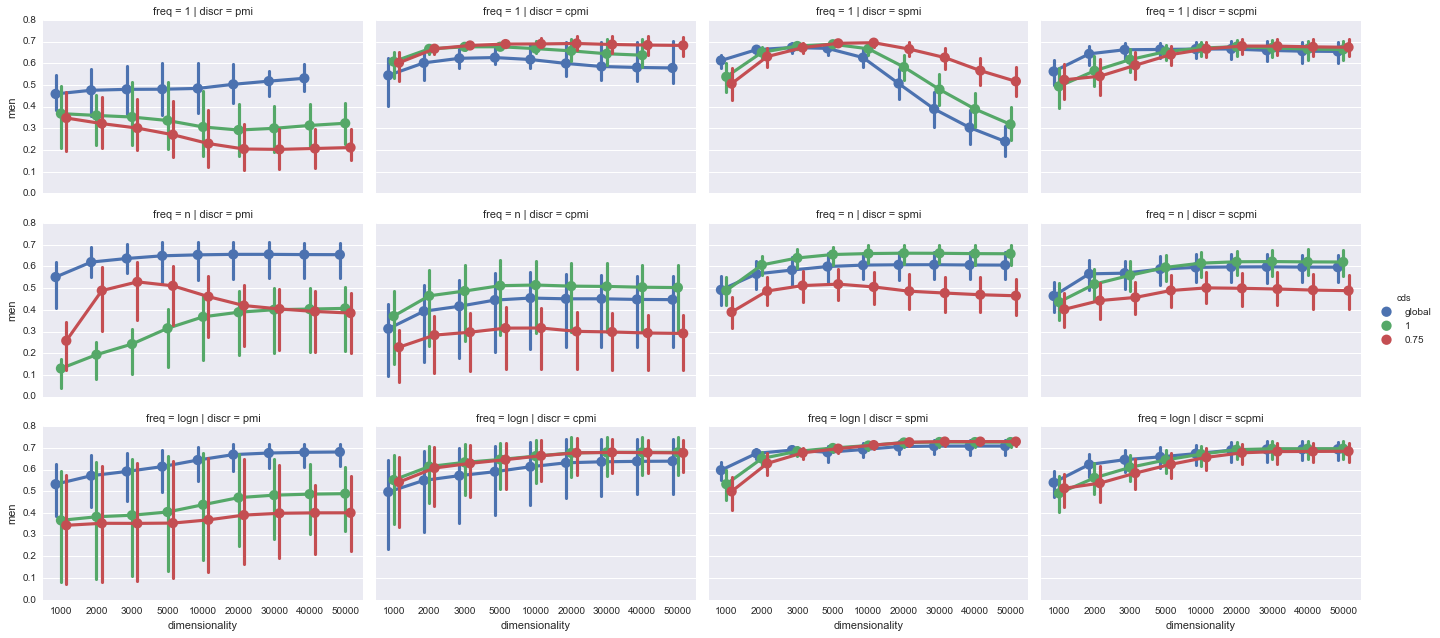

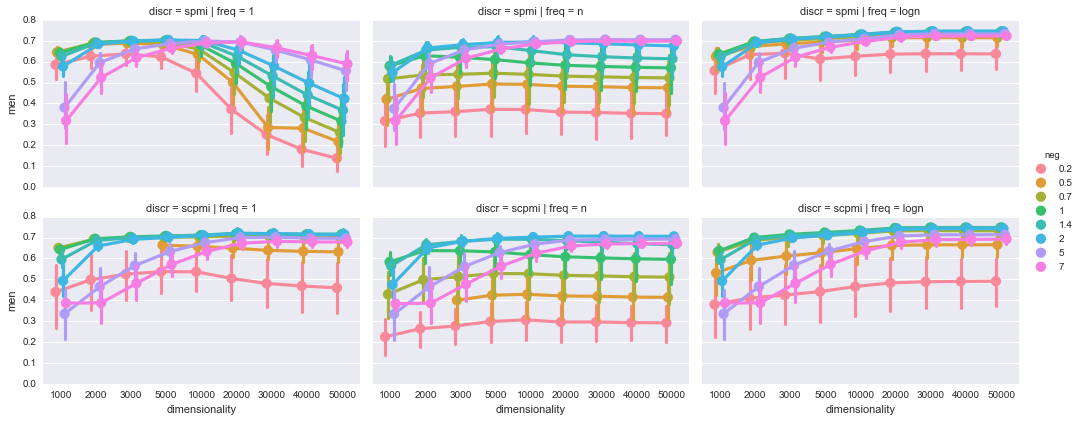

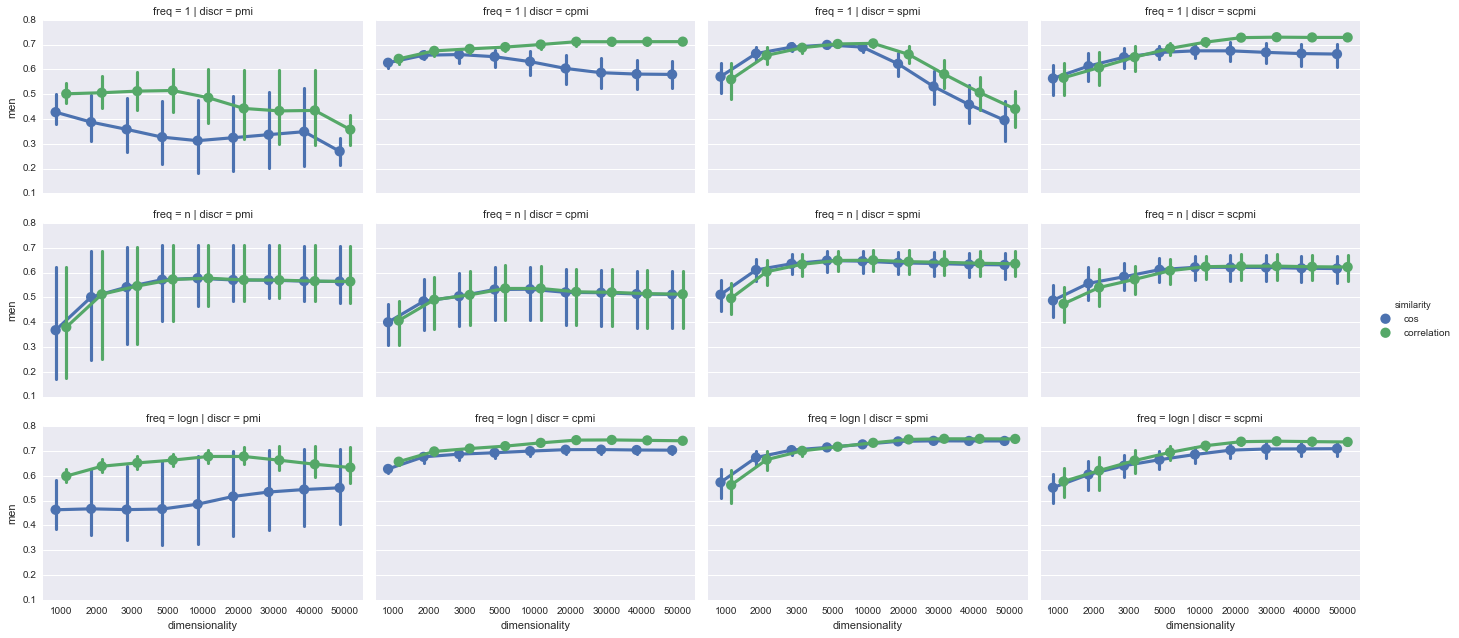

In [83]:
plot_interaction(results, 'men')

#  Parameter selection comparison

In [71]:
def plot_parameter_selection_comparison(data, dataset):
    g = sns.factorplot(
        data=data,
        y=dataset,
        x='dimensionality',
#         col='operator',
        hue='selection',
        hue_order=('max_', 'cross_validation', 'heuristics'),
        dodge=0.3,
    )
    g.fig.savefig('figures/{}-parameter_selection_comparison.pdf'.format(dataset))

In [111]:
heuristics_selection_simlex.loc['head', 1000]

-c:1: PerformanceWarning: indexing past lexsort depth may impact performance.


discr            corpus operator     cds  freq  \
operator dimensionality                                                   
head     1000             cpmi  ukwac_wackypedia     head    0.75     1   
         1000             cpmi  ukwac_wackypedia     head       1  logn   
         1000             cpmi  ukwac_wackypedia     head       1     n   
         1000                n  ukwac_wackypedia     head  global     1   
         1000                n  ukwac_wackypedia     head  global     1   
         1000                n  ukwac_wackypedia     head  global     1   
         1000              pmi  ukwac_wackypedia     head  global     1   
         1000              pmi  ukwac_wackypedia     head  global  logn   
         1000              pmi  ukwac_wackypedia     head  global     n   
         1000            scpmi  ukwac_wackypedia     head  global     1   
         1000            scpmi  ukwac_wackypedia     head  global  logn   
         1000            scpmi  ukwac_wackypedia     head  global     n   
         1000             spmi  ukwac_wackypedia     head       1     n   
         1000             spmi  ukwac_wackypedia     head  global     1   
         1000             spmi  ukwac_wackypedia     head  global  logn   

                        reduction base context_type  dimensionality  neg  \
operator dimensionality                                                    
head     1000                 raw              nvaa            1000  N/A   
         1000                 raw              nvaa            1000  N/A   
         1000                 raw              nvaa            1000  N/A   
         1000                 raw              nvaa            1000  N/A   
         1000                 raw              nvaa            1000  N/A   
         1000                 raw              nvaa            1000  N/A   
         1000                 raw              nvaa            1000  N/A   
         1000                 raw              nvaa            1000  N/A   
         1000                 raw              nvaa            1000  N/A   
         1000                 raw    e         nvaa            1000  0.7   
         1000                 raw    e         nvaa            1000  0.7   
         1000                 raw    e         nvaa            1000  1.4   
         1000                 raw    e         nvaa            1000  1.4   
         1000                 raw    e         nvaa            1000  0.7   
         1000                 raw    e         nvaa            1000  0.5   

                            similarity  SimLex999      men  emnlp2013_turk  \
operator dimensionality                                                      
head     1000              correlation    0.31202  0.65180         0.64368   
         1000              correlation    0.32126  0.66640         0.65996   
         1000              correlation    0.21056  0.48748         0.37712   
         1000              correlation    0.18043  0.35643         0.24767   
         1000                      cos    0.18227  0.36022         0.24568   
         1000            inner_product   -0.09080  0.02527         0.15230   
         1000              correlation    0.24248  0.54560         0.59700   
         1000              correlation    0.29218  0.62603         0.61856   
         1000              correlation    0.24800  0.62279         0.50649   
         1000              correlation    0.31445  0.64215         0.63680   
         1000              correlation    0.32001  0.65948         0.64840   
         1000              correlation    0.28479  0.65206         0.62849   
         1000                      cos    0.23956  0.62764         0.56211   
         1000                      cos    0.33860  0.64657         0.64449   
         1000                      cos    0.32895  0.64353         0.62186   

                          gs2011   selection  
operator dimensionality                       
head     1000            0.34992  h

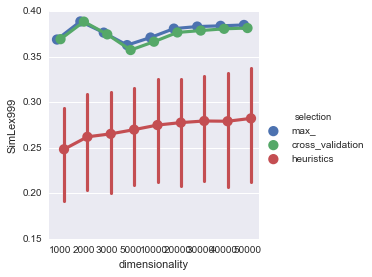

In [108]:
plot_parameter_selection_comparison(
    pd.concat(
        [
            max_selection_simlex,
            cross_validation_selection_simlex,
            heuristics_selection_simlex,
        ]
    ),
    'SimLex999'
)

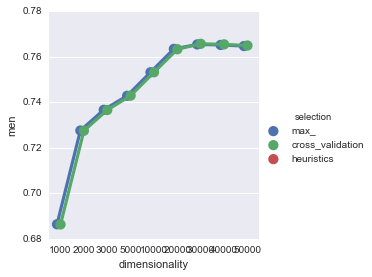

In [73]:
plot_parameter_selection_comparison(
    pd.concat(
        [
            max_selection_men,
            cross_validation_selection_men,
        ]
    ),
    'men'
)